In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import random

In [6]:
# Generate Hamiltonian
def spt_hamiltonian(L, J, h):
        pauli_x = np.array([[0,1],[1,0]])
        pauli_z = np.array([[1,0],[0,-1]])
        id = np.eye(2)

        sx_list = []
        sz_list = []
        for i_site in range(L):
                z_ops = [id] * L
                x_ops = [id] * L
                z_ops[i_site] = pauli_z
                x_ops[i_site] = pauli_x
                ZZ = z_ops[0]
                X =  x_ops[0]
                for j in range(1, L):
                        ZZ = np.kron(ZZ, z_ops[j])
                        X = np.kron(X, x_ops[j])
                sz_list.append(ZZ)
                sx_list.append(X)
        H_zxz = np.zeros((2**L, 2**L))
        H_xx = np.zeros((2**L, 2**L))

        for i in range(L-2):
                H_zxz += np.matmul(sz_list[i], np.matmul(sx_list[i+1], sz_list[(i + 2)]))
                H_xx += np.matmul(sx_list[i], sx_list[i+1])

        H_xx += np.matmul(sx_list[L-2], sx_list[L-1])

        return np.matrix(-J * H_zxz - h * H_xx)

def stringOp(L):
        pauli_x = np.array([[0,1],[1,0]])
        pauli_z = np.array([[1,0],[0,-1]])
        id = np.eye(2)
        
        ops = [id]*L
        if L%2 == 1:
                ops[0] = pauli_z
                ops[-1] = pauli_z
                for i in range(1, L-1, 2):
                        ops[i] = pauli_x
        elif L%2 == 0:
                ops[0] = pauli_z
                ops[L-2] = pauli_z 
                for i in range(1, L-2, 2):
                        ops[i] = pauli_x
        
        out = ops[0]
        for i in range(1, L):
                out = np.kron(out, ops[i])
                
        

        
        return out
        
        
        


In [7]:
L = 8

h_list = (4*np.random.rand(50000) - 2)


ground_energies = []
ground_states = []

orderParams = []

op = stringOp(L)
for h in h_list:
    energy, state = eigh(spt_hamiltonian(L, 1, h), eigvals_only = False)
    ground_energies.append(min(energy))
    ground_states.append(state[:, np.argmin(energy)])
    ket = np.transpose([ground_states[-1]])
    m = np.matmul(np.matrix(ket).H, np.matmul(op, ket))
    orderParams.append(m.item())


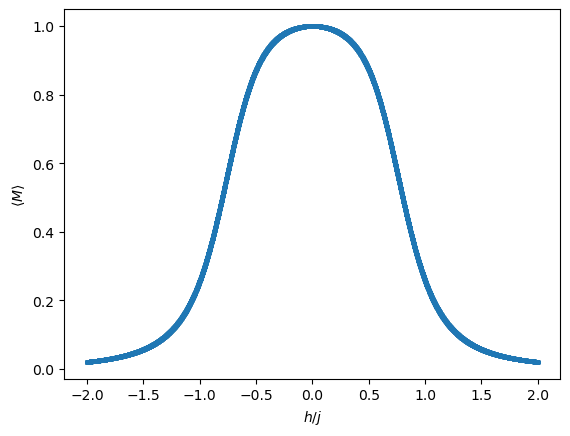

In [8]:
plt.scatter(h_list, orderParams, s=5)
plt.xlabel(r"$h/j$")
plt.ylabel(r"$\langle M\rangle$")
plt.show()

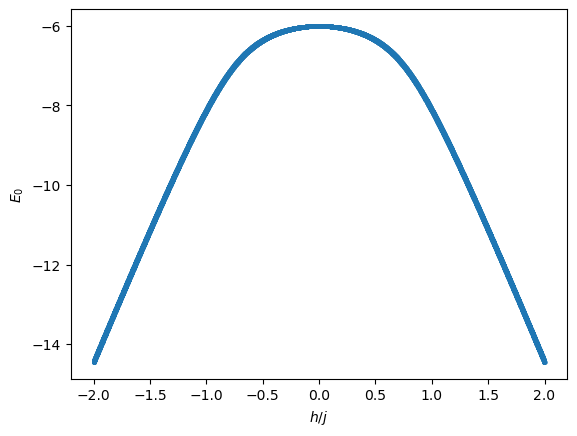

In [9]:
plt.scatter(h_list, ground_energies, s = 5)
plt.xlabel(r"$h/j$")
plt.ylabel(r"$E_0$")
plt.show()

In [3]:
phases = np.where(abs(np.array(orderParams))<0.05, 0, 1)
np.savez("spt_dataset.npz", h_list = h_list, ground_states = ground_states, orderParams = orderParams, phases = phases)

NameError: name 'orderParams' is not defined

In [2]:
spt_data = np.load("spt_dataset.npz")
spt_data

NpzFile 'spt_dataset.npz' with keys: h_list, ground_states, orderParams, phases

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


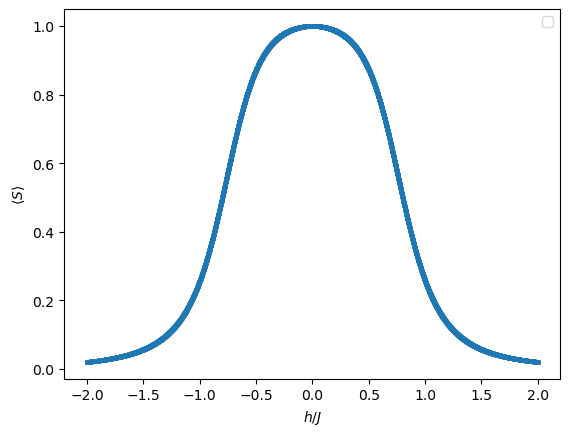

In [4]:
plt.scatter(spt_data['h_list'], spt_data['orderParams'], s=5)

plt.xlabel(r"$h/J$")
plt.ylabel(r"$\langle S\rangle$")
plt.legend()
plt.savefig('plots/spt_order_parameter.pdf')
plt.show()